# Density-Based Clustering

Density-based clustering algorithms identify clusters as dense regions of data points separated by regions of lower point density. These algorithms are particularly effective for identifying clusters of arbitrary shape and handling noise in the data.

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
DBSCAN is a popular density-based clustering algorithm that identifies clusters by looking for regions of high density separated by regions of low density.

## Mathematical Foundation

DBSCAN relies on two parameters: $\epsilon$ (epsilon) and $\text{minPts}$ (minimum points). The algorithm classifies points into three categories:
- **Core Points**: A point is a core point if at least $\text{minPts}$ points are within distance $\epsilon$.
- **Border Points**: A point is a border point if it is within distance $\epsilon$ of a core point but does not have enough neighbors to be a core point.
- **Noise Points**: A point is a noise point if it is neither a core point nor a border point.

Given a dataset $D = \{x_1, x_2, \ldots, x_n\}$, and the distance function $\text{dist}$:

1. **Neighborhood**: The $\epsilon$-neighborhood of a point $x$ is defined as:
---


>$$N_\epsilon(x) = \{ y \in D \mid \text{dist}(x, y) \leq \epsilon \}$$


---

2. **Core Point**: A point $x$ is a core point if:
---


>$$|N_\epsilon(x)| \geq \text{minPts}$$


---

3. **Directly Density-Reachable**: A point $y$ is directly density-reachable from a point $x$ if:
---


>$$y \in N_\epsilon(x) \text{ and } x \text{ is a core point}$$


---

4. **Density-Reachable**: A point $y$ is density-reachable from a point $x$ if there is a chain of points $\{x, x_1, x_2, \ldots, x_n, y\}$ where each point is directly density-reachable from the previous point.

5. **Density-Connected**: A point $x$ and a point $y$ are density-connected if there is a point $z$ such that both $x$ and $y$ are density-reachable from $z$.

## Algorithm Steps

1. **Find all the neighbor points within $\epsilon$ of each point.**
2. **Label a point as a core point if it has at least $\text{minPts}$ neighbors.**
3. **Form a cluster starting from any core point.**
4. **Recursively add all reachable core and border points to the cluster.**
5. **Repeat the process until all points are visited.**

## Implementation with Example

Let's implement DBSCAN on a synthetic dataset.


Silhouette Score: 0.3218845827750261


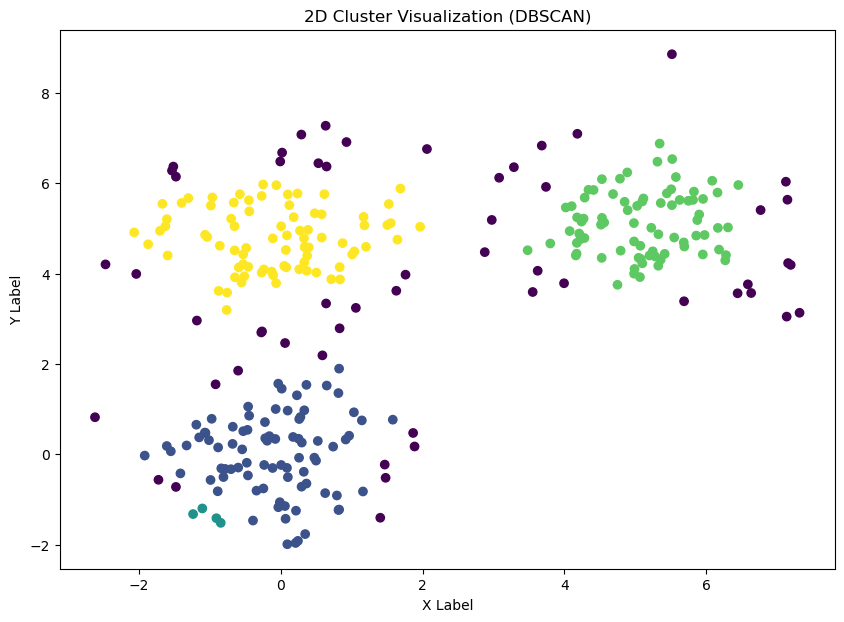

In [4]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Generate synthetic data
np.random.seed(42)
data = np.vstack([
    np.random.normal(loc=(0, 0), scale=1, size=(100, 2)),
    np.random.normal(loc=(5, 5), scale=1, size=(100, 2)),
    np.random.normal(loc=(0, 5), scale=1, size=(100, 2))
])

# Fit DBSCAN to the data
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(data)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(data, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Plot 2D visualization
plt.figure(figsize=(10, 7))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('2D Cluster Visualization (DBSCAN)')
plt.show()


## OPTICS (Ordering Points To Identify the Clustering Structure)

### Mathematical Foundation

OPTICS is similar to DBSCAN but can identify clusters with varying densities. It builds an augmented ordering of the database representing its density-based clustering structure.

Given a dataset $D = \{x_1, x_2, \ldots, x_n\}$, and the distance function $\text{dist}$:

1. **Core Distance**: The core distance of a point $x$ is defined as:
---


$$
\text{core_dist}_\epsilon(x) = 
\begin{cases} 
\text{minPts-distance}(x) & \text{si } |N_\epsilon(x)| \geq \text{minPts} \\
\text{indéfini} & \text{sinon}
\end{cases}
$$


---
2. **Reachability Distance**: The reachability distance of a point $y$ from a point $x$ is defined as:
---


$$
\text{reachability_dist}_\epsilon(x, y) = 
\begin{cases}
\max(\text{core\_dist}_\epsilon(x), \text{dist}(x, y)) & \text{if } x \text{ is a core point} \\
\text{undefined} & \text{otherwise}
\end{cases}
$$


---

### Algorithm Steps

1. **Initialize reachability distance and core distance for each point.**
2. **Order points based on their reachability distance.**
3. **Identify clusters by analyzing the reachability plot.**

### Implementation with Example

Let's implement OPTICS on a synthetic dataset.


Silhouette Score: 0.1762119220142286


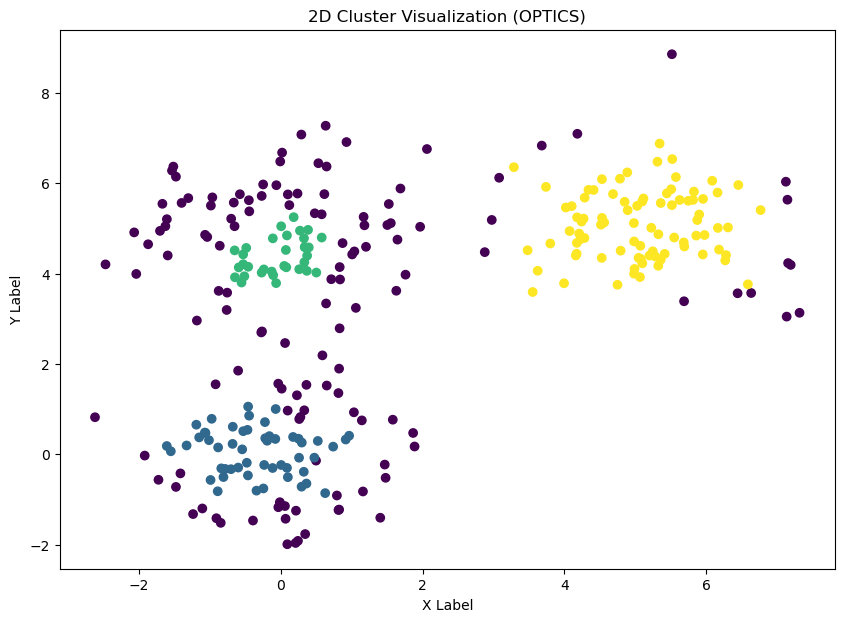

In [5]:
from sklearn.cluster import OPTICS
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Generate synthetic data
np.random.seed(42)
data = np.vstack([
    np.random.normal(loc=(0, 0), scale=1, size=(100, 2)),
    np.random.normal(loc=(5, 5), scale=1, size=(100, 2)),
    np.random.normal(loc=(0, 5), scale=1, size=(100, 2))
])

# Fit OPTICS to the data
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
labels = optics.fit_predict(data)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(data, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Plot 2D visualization
plt.figure(figsize=(10, 7))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('2D Cluster Visualization (OPTICS)')
plt.show()


## Cluster Evaluation

Evaluating clusters helps measure the quality and homogeneity of clusters formed by a clustering algorithm. Here are some commonly used methods for evaluating density-based clustering algorithms:

### Silhouette Score
The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. It is defined as:

---


>$$s = \frac{b - a}{\max(a, b)}$$

Where:
- $a$ is the average distance from the point to the other points in the same cluster.
- $b$ is the average distance from the point to the points in the nearest cluster.


---

**Interpretation**:
- Silhouette scores range from -1 to 1.
  - A score close to 1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
  - A score close to 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters.
  - A score close to -1 indicates that the object might have been assigned to the wrong cluster.


## 2D and 3D Visualizations

Visualizations help understand the structure of clusters. Here are examples of 2D and 3D visualizations using DBSCAN and OPTICS.

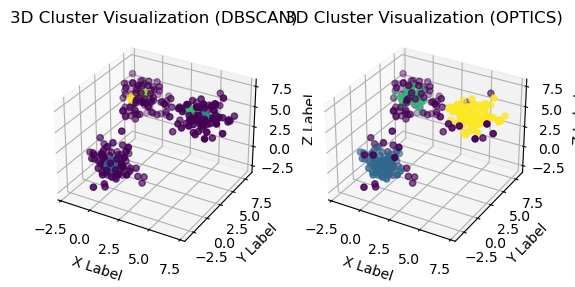

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN, OPTICS

# Generate synthetic 3D data
np.random.seed(42)
data_3d = np.vstack([
    np.random.normal(loc=(0, 0, 0), scale=1, size=(100, 3)),
    np.random.normal(loc=(5, 5, 5), scale=1, size=(100, 3)),
    np.random.normal(loc=(0, 5, 5), scale=1, size=(100, 3))
])

# Fit DBSCAN to the 3D data
dbscan_3d = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan_3d = dbscan_3d.fit_predict(data_3d)

# 3D cluster visualization for DBSCAN
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=labels_dbscan_3d, cmap='viridis')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Cluster Visualization (DBSCAN)')

# Fit OPTICS to the 3D data
optics_3d = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
labels_optics_3d = optics_3d.fit_predict(data_3d)

# 3D cluster visualization for OPTICS
ax = fig.add_subplot(122, projection='3d')
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=labels_optics_3d, cmap='viridis')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Cluster Visualization (OPTICS)')

plt.show()


## Extensions and Variants of DBSCAN and OPTICS

There are several extensions and variants of density-based clustering algorithms to handle different types of data and improve clustering performance.

### HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise)
HDBSCAN extends DBSCAN by converting it into a hierarchical clustering algorithm and then extracting a flat clustering based on the stability of clusters.

### Applications of Variants

- **HDBSCAN**: Used when the data contains clusters of varying densities and sizes, providing a more flexible clustering solution.
